In [1]:
!pip install gensim


In [2]:
import gensim

import gensim.downloader

Part 1: Word Embeddings

In [3]:
# Load pre-trained Word2Vec model trained on wikipedia data

model = gensim.downloader.load("glove-wiki-gigaword-100")
# Getting the vector for a word

dog = model['dog']

# Getting the most similar words

print(model.most_similar('dog'))

# Getting the similarity between two words

print(model.similarity('dog', 'cat'))


[('cat', 0.8798074126243591), ('dogs', 0.8344309329986572), ('pet', 0.7449564337730408), ('puppy', 0.723637580871582), ('horse', 0.7109653949737549), ('animal', 0.6817063093185425), ('pig', 0.655417263507843), ('boy', 0.6545308232307434), ('cats', 0.6471932530403137), ('rabbit', 0.6468630433082581)]
0.8798075


Part 1a

In [4]:

#find the most similar words to a word of your choice. 
#Does the result make sense? Look up some of the words if you don't know them
#Share and discuss with your group

model['bat']
print(model.most_similar('bat'))




[('bats', 0.7078340649604797), ('balls', 0.6811745762825012), ('pitch', 0.66105717420578), ('batting', 0.6423501372337341), ('wicket', 0.6401622891426086), ('ball', 0.638999879360199), ('toss', 0.6223500967025757), ('innings', 0.6081036329269409), ('pitches', 0.6000126600265503), ('batsman', 0.5938163995742798)]



### Yes, I think that these results above make sense. They are plural words or words relating to baseball, which is very rational.

In [5]:

#we can extract a "capital vector" by subtracting the vector for a country from the vector for its capital
capital= model["berlin"]-model['germany']

fra_capital=model["france"]+capital

print(model.most_similar(fra_capital))
#likewise, we can extract a "plural vector" by subtracting the vector for a singular noun from the vector for its plural
plural=model["cats"]-model["cat"]

print(model.most_similar(plural))

#we can also add vectors together
plural_dogs=model["dog"]+plural

print(model.most_similar(plural_dogs))



[('paris', 0.8827144503593445), ('france', 0.755802571773529), ('french', 0.7075165510177612), ('prohertrib', 0.6943174004554749), ('berlin', 0.666556179523468), ('brussels', 0.6574430465698242), ('lyon', 0.6526200175285339), ('london', 0.64079749584198), ('le', 0.6403627991676331), ('strasbourg', 0.6346526741981506)]
[('lowlanders', 0.4844588041305542), ('zebras', 0.45914992690086365), ('dicots', 0.45332765579223633), ('non-arabs', 0.45208773016929626), ('amerindians', 0.4478238821029663), ('buffalos', 0.4475124180316925), ('giraffes', 0.4466330111026764), ('bavarians', 0.4452260732650757), ('welshmen', 0.44406628608703613), ('dingos', 0.4440328776836395)]
[('dogs', 0.8921768665313721), ('cats', 0.8814380764961243), ('dog', 0.7873795628547668), ('animals', 0.7512702345848083), ('pets', 0.7392117977142334), ('cows', 0.6835324168205261), ('pet', 0.679297685623169), ('horses', 0.6774964928627014), ('pigs', 0.6755765080451965), ('animal', 0.6683687567710876)]


In [6]:
# this can be used to find examples of data bias in word embeddings

# for example, we can find the most similar words to "doctor" and "nurse"

gender=model["woman"]-model["man"]

print(model.most_similar(gender))
print(model.most_similar(-gender))

model.most_similar(model["doctor"]+gender)



[('menstruating', 0.6102039217948914), ('miscarry', 0.5550354719161987), ('lactating', 0.542172908782959), ('pre-eclampsia', 0.5129693150520325), ('uterus', 0.5093088150024414), ('ovulating', 0.5070309042930603), ('miscarried', 0.5043483376502991), ('adoptee', 0.5012543201446533), ('comnena', 0.5012539625167847), ('pulecio', 0.500389039516449)]
[('arsene', 0.4388486444950104), ('ancelotti', 0.4215139150619507), ('nistelrooy', 0.41140037775039673), ('strachan', 0.4089668393135071), ('rafa', 0.40728434920310974), ('technicals', 0.4060872495174408), ('allardyce', 0.4018688201904297), ('boss', 0.4010736346244812), ('rangers', 0.39962300658226013), ('utd', 0.3967454135417938)]


[('doctor', 0.8661208748817444),
 ('nurse', 0.7757077813148499),
 ('physician', 0.7128061652183533),
 ('woman', 0.7089030742645264),
 ('doctors', 0.6793617010116577),
 ('pregnant', 0.6787967681884766),
 ('patient', 0.6772217750549316),
 ('dentist', 0.6694242358207703),
 ('mother', 0.6586816310882568),
 ('medical', 0.6466937065124512)]

Part 1b

In [7]:
#try to isolate a specific dimension in the embeddings and add it to multiple words. 

politcal_stance=model["republican"]-model["democrat"]
print(model.most_similar(politcal_stance))
print(model.most_similar(-politcal_stance))


#does this show any bias or assumptions in the data? 
# Discuss with your group and share most interesting dimension in the document

[('buildup', 0.46877893805503845), ('congressional', 0.45526570081710815), ('intended', 0.4427412748336792), ('fundraising', 0.43989327549934387), ('largely', 0.43913453817367554), ('lobbyists', 0.43417248129844666), ('actual', 0.43213358521461487), ('effort', 0.4271855354309082), ('events', 0.4267345070838928), ('insurgent', 0.4259740710258484)]
[('majdan', 0.48811718821525574), ('tixier', 0.4798935651779175), ('oskars', 0.47933146357536316), ('elżbieta', 0.47864359617233276), ('nawakwi', 0.4692296087741852), ('maritza', 0.4666050970554352), ('faltas', 0.4633403420448303), ('agus', 0.46185222268104553), ('colombe', 0.45940226316452026), ('morauta', 0.45179346203804016)]


Part 2: Visualization and Embeddings in Space

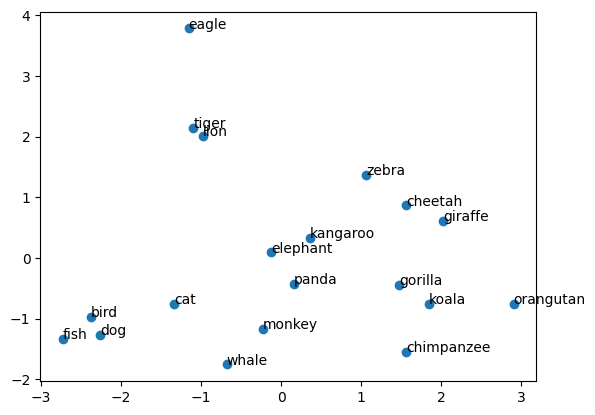

In [8]:
#visualize pca of word embeddings

from sklearn.decomposition import PCA

import matplotlib.pyplot as plt

words=["dog","cat","fish", "whale", "bird", "eagle", "lion", "tiger", "cheetah", "elephant", "giraffe", "zebra", "kangaroo", "koala", "panda", "monkey", "gorilla", "chimpanzee", "orangutan", ]

X=[model[word] for word in words]

#identify clusters of words in the word embeddings at high dimensions

pca=PCA(n_components=2)

X_pca=pca.fit_transform(X)

plt.scatter(X_pca[:,0],X_pca[:,1])

for i, word in enumerate(words):
    plt.annotate(word, (X_pca[i,0],X_pca[i,1]))

plt.show()

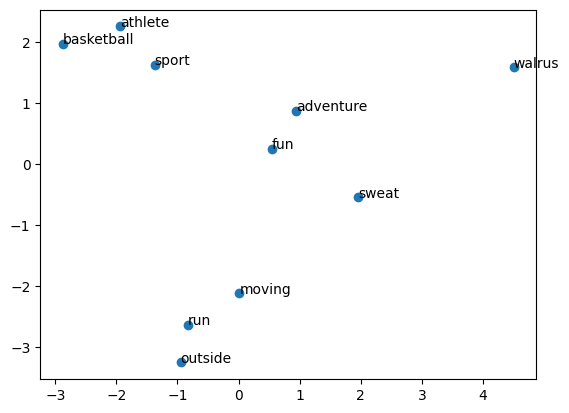

In [9]:
#repeat this process with your own set of 10-20 words. 
#Does the proximity between words and overall distances make sense? Work as a group and discuss your individual findings.
#yes, I purposefully chose 9 words that I thought would be closely related (the are all sports words that I would assocaite with eachother), and then "walrus"
#hoping that it was not that connected to the other words so that it would stand out a little. All the sports words are located together whiel walrus 
#is pretty much by itself, but close to words like "outside" and "adventure"

from sklearn.decomposition import PCA

import matplotlib.pyplot as plt

words=["run","sport","athlete","basketball","sweat","fun","moving","walrus","outside","adventure" ]

X=[model[word] for word in words]

#identify clusters of words in the word embeddings at high dimensions

pca=PCA(n_components=2)

X_pca=pca.fit_transform(X)

plt.scatter(X_pca[:,0],X_pca[:,1])

for i, word in enumerate(words):
    plt.annotate(word, (X_pca[i,0],X_pca[i,1]))

plt.show()


# Does the proximity between words and overall distances make sense? Work as a group and discuss your individual findings.
yes, I purposefully chose 9 words that I thought would be closely related (the are all sports words that I would assocaite with eachother), and then "walrus"hoping that it was not that connected to the other words so that it would stand out a little. All the sports words are located together whiel walrus  is pretty much by itself, but close to words like "outside" and "adventure"

In [10]:
# repeat the process with a different pre-trained model and the same set of words. 
# What has changed in the embedding space? What might this have to do with the training data?
twitter_model= gensim.downloader.load("glove-twitter-100")


Part 3: Embedding reddit posts

In [11]:
#read in uiuc csv
import pandas as pd
uiuc=pd.read_csv("uiuc.csv")
mich=pd.read_csv("umich.csv")

#sample so we have even number of samples from each dataset
mich=mich.sample(n=4725)

#assign labels based on origin subreddit of comment
uiuc['label']=1
mich['label']=0

#you will be working with the data csv for the rest of the question
data=pd.concat([uiuc,mich])




In [ ]:
#using the code from project 1, clean the text and create a bag of words representation of the text
import pandas as pd
from sklearn.feature_extraction.text import CountVectorizer
import spacy
language_model = spacy.load("en_core_web_sm")
import matplotlib.pyplot as plt

import numpy as np
vectorizer = CountVectorizer()
bag_of_words_mich = vectorizer.fit_transform(mich)
bag_of_words_uiuc = vectorizer.fit_transform(uiuc)



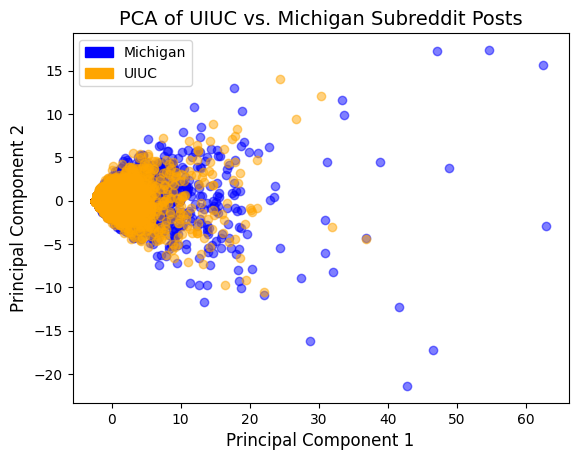

In [21]:
#using the embedding code from last week, plot a pca of all posts in the subreddits data set
uiuc = pd.read_csv("uiuc.csv")
mich = pd.read_csv("umich.csv")

# Sample Michigan dataset to match UIUC size
mich = mich.sample(n=4725, random_state=42)  # Ensuring reproducibility

# Assign labels: UIUC = 1, Michigan = 0
uiuc['label'] = 1
mich['label'] = 0

# Concatenate datasets
data = pd.concat([uiuc, mich])

# Extract text and labels
texts = data["text"].fillna("")  # Ensure no NaNs
labels = data["label"]

# Create a unified Bag of Words representation
vectorizer = CountVectorizer(max_features=5000)  # Limit vocabulary size for efficiency
bag_of_words = vectorizer.fit_transform(texts)

# Apply PCA
pca = PCA(n_components=2)
principalComponents = pca.fit_transform(bag_of_words.toarray())  # Convert sparse matrix to dense

# Create a DataFrame for visualization
pca_df = pd.DataFrame(data=principalComponents, columns=['PC1', 'PC2'])
labels=labels.reset_index(drop=True)
pca_df["label"] = labels

# Plot PCA with color coding
fig, ax = plt.subplots()
colors = {0: "blue", 1: "orange"}

for label in colors:
    subset = pca_df[pca_df["label"] == label]
    ax.scatter(subset["PC1"], subset["PC2"], label=f"Label {label}", color=colors[label], alpha=0.5)

# Set labels and title
ax.set_xlabel("Principal Component 1", fontsize=12)
ax.set_ylabel("Principal Component 2", fontsize=12)
ax.set_title("PCA of UIUC vs. Michigan Subreddit Posts", fontsize=14)

# Create a legend
blue_patch = mpatches.Patch(color='blue', label='Michigan')
orange_patch = mpatches.Patch(color='orange', label='UIUC')
ax.legend(handles=[blue_patch, orange_patch])

# Show plot
plt.show()

#color by the "label" column to see if the two subreddits are separable in the embedding space

# is there a clear separation between the two columns? 

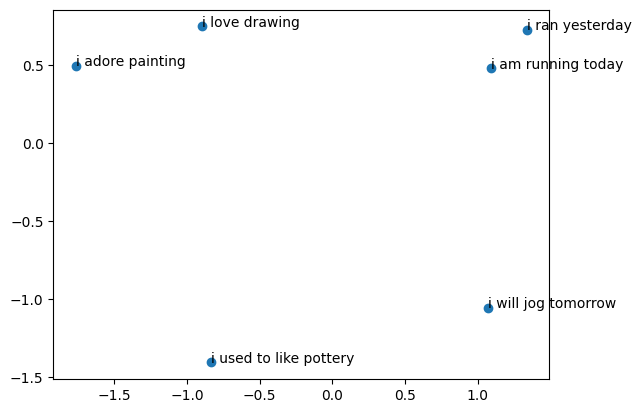

In [ ]:
#here is a function to calculate the average embedding of a cleaned document
import numpy as np
#we can sum together all the embeddings to get a representation of all the concepts expressed in the document
def avg_embedding(sentence, model):
    words=sentence.split()
    embeddings=[model[word] for word in words if word in model]
    return np.mean(embeddings, axis=0)

sentences=["i am running today", "i will jog tomorrow", "i ran yesterday", "i love drawing", "i adore painting", "i used to like pottery"]

#we can then calculate the average embedding of each sentence

avg_embeddings=[avg_embedding(sentence, model) for sentence in sentences]

#remove nan values
avg_embeddings=[embedding for embedding in avg_embeddings if not np.isnan(embedding).any()]
#we can then plot the pca of these embeddings

pca=PCA(n_components=2)

X_pca=pca.fit_transform(avg_embeddings)

plt.scatter(X_pca[:,0],X_pca[:,1])

for i, sentence in enumerate(sentences):
    plt.annotate(sentence, (X_pca[i,0],X_pca[i,1]))

plt.show()

In [ ]:

#use this function to calculate the average embedding of each post in the dataset

#plot the pca of the average embeddings, color by the "label" column

#how is this plot different from the previous one?

#is there clear separation? 

Part 4: HuggingFace and BERT

In [ ]:
!pip install transformers[torch]

In [15]:
#Please wait until after next week to start

# Use a pipeline as a high-level helper
from transformers import pipeline

#download bert model
pipe = pipeline("text-classification", model="finiteautomata/bertweet-base-sentiment-analysis")


emoji is not installed, thus not converting emoticons or emojis into text. Install emoji: pip3 install emoji==0.6.0
Device set to use cpu


In [16]:
#use the pipeline to classify the sentiment of a sentence of your choice
pipe("I love this class")

[{'label': 'POS', 'score': 0.9923704862594604}]

In [28]:
#use the pipeline to classify the sentiment of all posts in the reddit dataset
#report the most common sentiment label
#poems=pd.read_csv("kaggle_poem_dataset.csv").head(100)
#sentiment_model(poems["Content"][0])
#short context window, so only keep first part of each poem

#poems["Content"]=poems["Content"].apply(lambda x:x[:300])

#sentiments=[]
#for poem in poems["Content"]:
  #sentiments.append(sentiment_model(poem))


In [ ]:
#look at ten sample posts and labels; do you agree with all of them? 

In [ ]:
#is the UIUC or Michigan subreddit more negative?

I think i used the correct code for the part above. However, I dont know how to alter it to get the text of the subreddits. I emailed the TA for more time but will turn this in now so i dont get a late credit on the part.